# Other plotting libraries
We've already seen Matplotlib and Altair.  The point of this notebook is to show a few other popular libraries, which will have syntax very similar to Altair.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import holoviews as hv
import altair as alt
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [43]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [74]:
diamonds = sns.load_dataset('diamonds')

In [75]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<AxesSubplot:xlabel='carat', ylabel='price'>

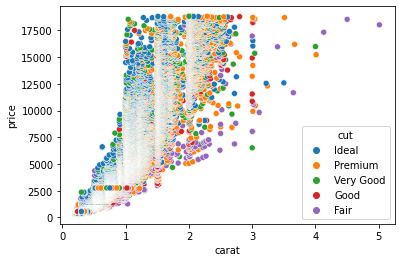

In [77]:
sns.scatterplot(data=diamonds,x='carat',y='price',hue='cut')

In [55]:
titanic = sns.load_dataset("titanic")

In [66]:
alt.Chart(titanic.query("20<fare<100")).mark_point().encode(
    x = 'age',
    y = 'fare',
    color = 'survived:N',
)

alt.Chart(...)

In [45]:
planets = sns.load_dataset("planets")

In [53]:
planets.isnull().any(axis=1).sum()

537

In [71]:
alt.Chart(planets.query('orbital_period<300')).mark_circle().encode(
    x = 'distance',
    y = 'orbital_period',
)

alt.Chart(...)

## I think this is too much of a digression.  Let's get a dataset from Seaborn instead.

In [12]:
iris = load_iris()

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
cols = ['_'.join(x.split()[:2]) for x in iris.feature_names]

In [26]:
# An easier way which is only somewhat less robust.
[x[:-5].replace(" ","_") for x in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [23]:
# Who knows what this is
type(iris)

sklearn.utils.Bunch

In [27]:
df_iris = pd.DataFrame(iris.data,columns=cols)

In [28]:
# We can't initialize a new column using the attribute notation df_iris.class
# Actually I guess we can never use .class, maybe that is a restricted term.
df_iris["class"] = np.nan

In [29]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,5.0,1.9,NaN
147,6.5,3.0,5.2,2.0,NaN
148,6.2,3.4,5.4,2.3,NaN


In [30]:
# We could have also just done this at the beginning.
df_iris["class"] = iris.target

In [31]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
df_iris["class"].map(lambda x: iris.target_names[x])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [34]:
#Notice we haven't changed anything yet
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
df_iris["class"] = df_iris["class"].map(lambda x: iris.target_names[x])

In [36]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
df_iris["class"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: class, dtype: int64